## Project 1: Addition Basic Classification

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import keras

from keras.layers import *
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical
import keras.backend as K
import tensorflow as tf

from random import shuffle
from time import time

In [140]:
print(keras.__version__)
print(tf.__version__)

2.1.1
1.3.0


### Step 1: Prepare training data

In [141]:
num_of_class_x = 101 # Number of classes of 1st input
num_of_class_y = 101 # Number of classes of 2nd input
num_classes = 201 # Number of classes for output result

num_data = 100000
remove_list = [25,50,75]

### Step 2: Generate training data

In [142]:
def generate_data():
    t = [] # Normal data and label set
    v = [] # Removed data and label set
    for i in range(num_data):
        d1 = np.random.randint(0,num_of_class_x)
        d2 = np.random.randint(0,num_of_class_y)
        if d1 in remove_list or d2 in remove_list:
            v.append((d1,d2,d1+d2))
            continue
        t.append((d1,d2,d1+d2))
    return t

In [143]:
z = generate_data()

# Split into data & label
x = np.array([v[0:2] for v in z]).astype('float32')
y = np.array([v[2:][0] for v in z]).astype('float32')

x_data = x / (num_of_class_x - 1) # Normalize data to [0,1]
y_data = to_categorical(y,num_classes) # One hot encoding

# Split into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2)

print('\n-------------- x_data ---------------\n')
print(x[100])
print('\n--------- normalized_x_data ---------\n')
print(x_data[100])
print('\n-------------- y_data ---------------\n')
print(y[100])
print('\n---------- one_hot_y_data -----------\n')
print(y_data[100])


-------------- x_data ---------------

[ 53.  88.]

--------- normalized_x_data ---------

[ 0.52999997  0.88      ]

-------------- y_data ---------------

141.0

---------- one_hot_y_data -----------

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

### Step 3: Setup the model

In [144]:
input_data = Input(shape=(2,))

x = Dense(400,activation='relu',name='dense_1')(input_data)
x = Dense(300,activation='relu',name='dense_2')(x)
x = Dense(200,activation='relu',name='dense_3')(x)
x = Dense(100,activation='relu',name='dense_4')(x)
output_result = Dense(num_classes,activation='softmax',name='out')(x)

model = Model(input_data,output_result)

# Define loss function & optimizer
adam = keras.optimizers.Adam(lr=0.005,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
out (Dense)                  (None, 201)               20301     
Total params: 222,101
Trainable params: 222,101
Non-trainable params: 0
_________________________________________________________________


### Step 4: Train the model

In [145]:
batch_size = 10000
epochs = 300

history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 75371 samples, validate on 18843 samples
Epoch 1/300
75371/75371 [==============================] - 1s 15us/step - loss: 5.2110 - acc: 0.0091 - val_loss: 5.0848 - val_acc: 0.0096
Epoch 2/300
75371/75371 [==============================] - 0s 3us/step - loss: 5.0274 - acc: 0.0089 - val_loss: 4.9451 - val_acc: 0.0089
Epoch 3/300
75371/75371 [==============================] - 0s 4us/step - loss: 4.8514 - acc: 0.0111 - val_loss: 4.6473 - val_acc: 0.0195
Epoch 4/300
75371/75371 [==============================] - 0s 4us/step - loss: 4.4042 - acc: 0.0284 - val_loss: 4.0193 - val_acc: 0.0568
Epoch 5/300
75371/75371 [==============================] - 0s 4us/step - loss: 3.8834 - acc: 0.0469 - val_loss: 3.6510 - val_acc: 0.0734
Epoch 6/300
75371/75371 [==============================] - 0s 4us/step - loss: 3.5277 - acc: 0.0792 - val_loss: 3.3624 - val_acc: 0.0881
Epoch 7/300
75371/75371 [==============================] - 0s 4us/step - loss: 3.2652 - acc: 0.1022 - val_loss: 3.1472 - val_ac

75371/75371 [==============================] - 0s 4us/step - loss: 1.4714 - acc: 0.5331 - val_loss: 1.4724 - val_acc: 0.5569
Epoch 61/300
75371/75371 [==============================] - 0s 4us/step - loss: 1.4605 - acc: 0.5670 - val_loss: 1.4617 - val_acc: 0.5692
Epoch 62/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.4417 - acc: 0.5704 - val_loss: 1.4635 - val_acc: 0.5752
Epoch 63/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.4348 - acc: 0.5673 - val_loss: 1.4375 - val_acc: 0.5691
Epoch 64/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.4272 - acc: 0.5759 - val_loss: 1.4471 - val_acc: 0.5382
Epoch 65/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.4198 - acc: 0.5603 - val_loss: 1.4337 - val_acc: 0.5313
Epoch 66/300
75371/75371 [==============================] - 0s 4us/step - loss: 1.4113 - acc: 0.5631 - val_loss: 1.4074 - val_acc: 0.5761
Epoch 67/300
75371/75371 [=====================

75371/75371 [==============================] - 0s 3us/step - loss: 1.1148 - acc: 0.7245 - val_loss: 1.1360 - val_acc: 0.7062
Epoch 120/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.1132 - acc: 0.7263 - val_loss: 1.1358 - val_acc: 0.6930
Epoch 121/300
75371/75371 [==============================] - 0s 4us/step - loss: 1.1123 - acc: 0.7223 - val_loss: 1.1246 - val_acc: 0.6900
Epoch 122/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.1068 - acc: 0.7064 - val_loss: 1.1140 - val_acc: 0.7038
Epoch 123/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.1023 - acc: 0.7255 - val_loss: 1.1135 - val_acc: 0.7371
Epoch 124/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.1002 - acc: 0.7182 - val_loss: 1.1143 - val_acc: 0.6942
Epoch 125/300
75371/75371 [==============================] - 0s 3us/step - loss: 1.0960 - acc: 0.7096 - val_loss: 1.1133 - val_acc: 0.7025
Epoch 126/300
75371/75371 [==============

75371/75371 [==============================] - 0s 4us/step - loss: 0.9543 - acc: 0.7584 - val_loss: 0.9650 - val_acc: 0.7809
Epoch 179/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9495 - acc: 0.7819 - val_loss: 0.9579 - val_acc: 0.7948
Epoch 180/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9445 - acc: 0.8019 - val_loss: 0.9610 - val_acc: 0.7683
Epoch 181/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9442 - acc: 0.7858 - val_loss: 0.9592 - val_acc: 0.8007
Epoch 182/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9390 - acc: 0.7986 - val_loss: 0.9555 - val_acc: 0.7745
Epoch 183/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9397 - acc: 0.7866 - val_loss: 0.9524 - val_acc: 0.8243
Epoch 184/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.9362 - acc: 0.8004 - val_loss: 0.9443 - val_acc: 0.8223
Epoch 185/300
75371/75371 [==============

75371/75371 [==============================] - 0s 4us/step - loss: 0.8426 - acc: 0.8186 - val_loss: 0.8580 - val_acc: 0.7925
Epoch 238/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8364 - acc: 0.8283 - val_loss: 0.8467 - val_acc: 0.8399
Epoch 239/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8357 - acc: 0.8391 - val_loss: 0.8472 - val_acc: 0.8413
Epoch 240/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8321 - acc: 0.8441 - val_loss: 0.8489 - val_acc: 0.8247
Epoch 241/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8346 - acc: 0.8370 - val_loss: 0.8503 - val_acc: 0.8359
Epoch 242/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8301 - acc: 0.8385 - val_loss: 0.8435 - val_acc: 0.8468
Epoch 243/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.8267 - acc: 0.8506 - val_loss: 0.8407 - val_acc: 0.8657
Epoch 244/300
75371/75371 [==============

75371/75371 [==============================] - 0s 4us/step - loss: 0.7580 - acc: 0.8809 - val_loss: 0.7817 - val_acc: 0.8663
Epoch 297/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.7614 - acc: 0.8815 - val_loss: 0.7814 - val_acc: 0.8724
Epoch 298/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.7586 - acc: 0.8820 - val_loss: 0.7748 - val_acc: 0.8813
Epoch 299/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.7546 - acc: 0.8837 - val_loss: 0.7714 - val_acc: 0.8490
Epoch 300/300
75371/75371 [==============================] - 0s 4us/step - loss: 0.7554 - acc: 0.8776 - val_loss: 0.7687 - val_acc: 0.8778


### Step 5: Visualize training process

In [146]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

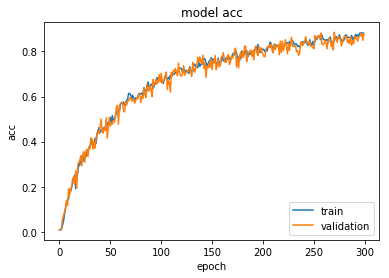

In [147]:
plot_train(history)

### Step 6: Evaluate & save the model

In [148]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test Accuracy: ',score[1])
print('Test Loss: ',score[0])

model.save('model.h5')

18843/18843 [==============================] - 1s 50us/step
Test Accuracy:  0.877779546769
Test Loss:  0.76873274958


### Step 7: Let's make some predictions

In [149]:
num_test = 10000
count = 0
correct = 0

# Random test
for i in range(num_test):
    count = count + 1
    d1 = np.random.randint(0,num_of_class_x)
    d2 = np.random.randint(0,num_of_class_y)
    d3 = np.array([[d1,d2]]).astype('float32') / (num_of_class_x - 1)    
    d4 = np.argmax(model.predict(d3))
    if d4 == d1 + d2:
        correct = correct + 1
print('Prediction Accuracy: ',correct/count*100)

# Challenging test (with removed data)
for i in range(num_of_class_x):
    for j in remove_list:
        count = count + 1
        d1 = np.random.randint(0,num_of_class_x)
        d2 = j
        d3 = np.array([[d1,d2]]).astype('float32') / (num_of_class_x - 1)    
        d4 = np.argmax(model.predict(d3))
        if d4 == d1 + d2:
            correct = correct + 1
print('(Challenge) Prediction Accuracy: ',correct/count*100)

Prediction Accuracy:  87.59
(Challenge) Prediction Accuracy:  87.7220227118315
